#### Free Chloride X

### Se importan las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Se cargan los datos

In [2]:
data = pd.read_csv("data/data_all.csv", sep=";")

data

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


### Preprocesamiento

In [3]:
# Se buscan registros NaN para eliminarlos
print('Columna      Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna      Cantidad NaN
date                           0
date(m/d/y)                    0
time                           0
day                            0
concentration                  0
chloride_80ft(mg/L)            0
chloride_1100ft(mg/L)          0
difference_chloride            0
CL2_80ft(PPM)                  0
CL2_1100ft(PPM)                0
difference_CL2                 0
DO_YSI_80ft(mg/L)              0
DO_YSI_1100ft(mg/L)            0
difference_DO_YSI              0
FreeClorine_ATI_80ft(PPM)      0
FreeClorine_ATI_1100ft(PPM)    0
difference_FreeClorine_ATI     0
FreeClorine_X_80ft(PPM)        0
FreeClorine_X_1100ft(PPM)      0
difference_FreeClorine_X       0
ORP_YSI_80ft(mV)               0
ORP_YSI_1100ft(mV)             0
difference_ORP_YSI             0
pH_YSI_80ft                    0
pH_YSI_1100ft                  0
difference_pH                  0
sp_cond_YSI_80ft(µS/cm)        0
sp_cond_YSI_1100ft(µS/cm)      0
difference_sp_cond_YSI         0
turbidity_YSI_80f

In [4]:
# Se eliminan los registros NaN del DataFrame
data = data.dropna()

In [5]:
# Se genera las estadísticas del DataFrame
data.describe()

,time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),difference_CL2,DO_YSI_80ft(mg/L),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,16.382061,17.323882,0.941821,0.932812,0.953690,0.020911,14.553035,...,103.948882,7.156677,8.652077,1.495399,283.683706,286.035144,2.351438,0.745367,0.068371,-0.676997
std,1.857436,0.500377,1.164567,0.285729,0.511636,0.600773,0.155687,0.158904,0.234459,0.145409,...,32.323375,0.050923,0.091153,0.110395,2.617900,2.224671,0.625695,0.167960,0.101617,0.192369
min,10.050000,1.000000,0.000000,15.620000,16.550000,-0.360000,0.470000,0.490000,-0.510000,14.130000,...,56.000000,6.980000,8.240000,1.060000,281.000000,283.000000,1.000000,0.000000,-0.100000,-2.500000
25%,12.562500,1.000000,0.000000,16.290000,16.880000,0.460000,0.982500,1.000000,0.000000,14.530000,...,79.000000,7.140000,8.650000,1.470000,281.000000,284.000000,2.000000,0.700000,0.000000,-0.800000
50%,14.120000,2.000000,0.400000,16.390000,17.105000,0.870000,1.000000,1.020000,0.020000,14.610000,...,100.000000,7.150000,8.670000,1.490000,285.000000,287.000000,2.000000,0.800000,0.000000,-0.700000
75%,15.287500,2.000000,1.500000,16.470000,17.880000,1.590000,1.010000,1.040000,0.030000,14.640000,...,114.000000,7.190000,8.700000,1.560000,286.000000,288.000000,3.000000,0.800000,0.100000,-0.600000
max,17.300000,2.000000,3.000000,17.120000,18.350000,1.930000,1.030000,1.050000,0.560000,14.740000,...,251.000000,7.230000,8.730000,1.750000,287.000000,289.000000,3.000000,2.600000,0.500000,0.100000


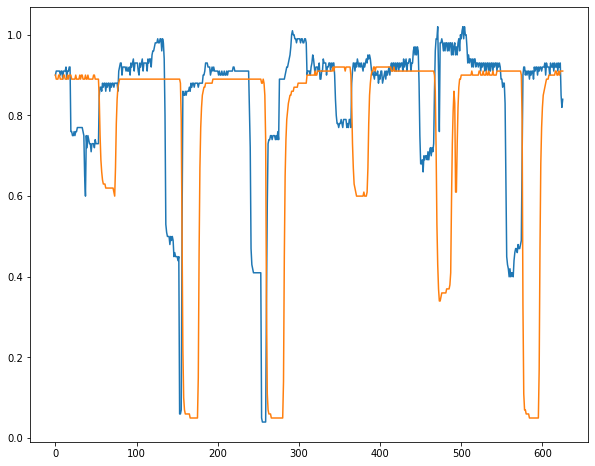

In [6]:
# Gráfica unificada de la variable
variable1 = data['FreeClorine_X_80ft(PPM)']
variable2 = data['FreeClorine_X_1100ft(PPM)']


# CI2-F (ATI) 80ft (PPM) --> Azul
plot = variable1.plot(figsize=(10, 8))
# CI2-F 2 (Rosemont) 80ft (PPM) --> Naranja
plot = variable2.plot(figsize=(10, 8))


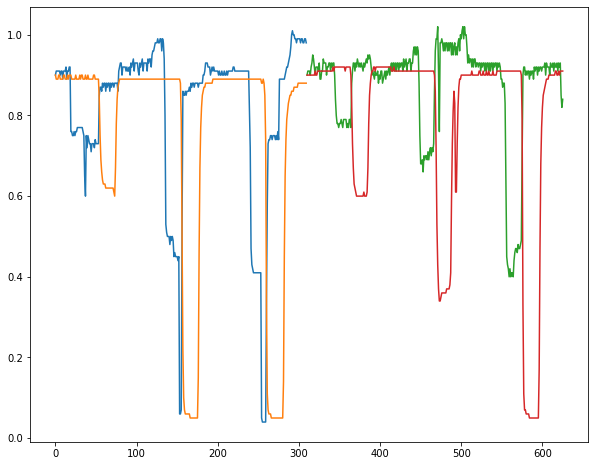

In [7]:
# Gráfica por día y variable 
data_dia_1 = data[data["date(m/d/y)"] == '25/01/05']
data_dia_2 = data[data["date(m/d/y)"] == '26/01/05']

# Azul
plot = data_dia_1['FreeClorine_X_80ft(PPM)'].plot(figsize=(10, 8))
# Naranja
plot = data_dia_1['FreeClorine_X_1100ft(PPM)'].plot(figsize=(10, 8))
# Verde
plot = data_dia_2['FreeClorine_X_80ft(PPM)'].plot(figsize=(10, 8))
# Roja
plot = data_dia_2['FreeClorine_X_1100ft(PPM)'].plot(figsize=(10, 8))

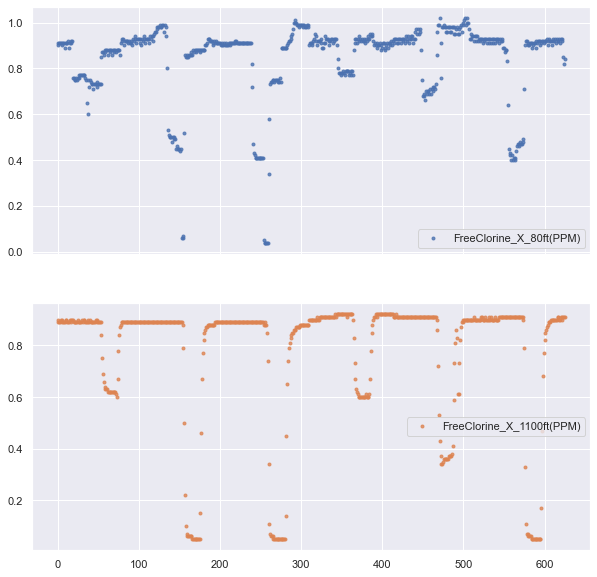

In [8]:
# Gráfica para ver valores atípicos
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10, 5)})

data1 = data[data["date(m/d/y)"] == '25/01/05']
data2 = data[data["date(m/d/y)"] == '26/01/05']

col_graf = ['FreeClorine_X_80ft(PPM)', 'FreeClorine_X_1100ft(PPM)'] 
ejes = data[col_graf].plot(marker='.', alpha=0.8, linestyle='None',figsize=(10,10),subplots=True)

In [9]:
# Se ordena el DataFrame de mayor a menor valor (para los dos días)
data_1 = data.drop(['FreeClorine_X_1100ft(PPM)'], axis=1)

ATI_80 = data_1.sort_values('FreeClorine_X_80ft(PPM)')

print(ATI_80)

               date date(m/d/y)   time  day  concentration  \
259  25/01/05 16:39    25/01/05  16.39    1            3.0   
258  25/01/05 16:38    25/01/05  16.38    1            3.0   
257  25/01/05 16:37    25/01/05  16.37    1            3.0   
256  25/01/05 16:36    25/01/05  16.36    1            3.0   
255  25/01/05 16:35    25/01/05  16.35    1            3.0   
..              ...         ...    ...  ...            ...   
292  25/01/05 17:12    25/01/05  17.12    1            3.0   
501  26/01/05 13:57    26/01/05  13.57    2            1.5   
502  26/01/05 13:58    26/01/05  13.58    2            1.5   
504  26/01/05 14:00    26/01/05  14.00    2            1.5   
471  26/01/05 13:27    26/01/05  13.27    2            1.5   

     chloride_80ft(mg/L)  chloride_1100ft(mg/L)  difference_chloride  \
259                17.02                  16.68                -0.34   
258                17.03                  16.67                -0.36   
257                17.01               

In [10]:
# Se ordena el DataFrame de mayor a menor valor (para los dos días)
data_2 = data.drop(['FreeClorine_X_80ft(PPM)'], axis=1)

Rosemont_80 = data_2.sort_values('FreeClorine_X_1100ft(PPM)')

print(Rosemont_80)

               date date(m/d/y)   time  day  concentration  \
172  25/01/05 15:16    25/01/05  15.16    1            1.5   
587  26/01/05 15:22    26/01/05  15.22    2            3.0   
588  26/01/05 15:23    26/01/05  15.23    2            3.0   
589  26/01/05 15:24    26/01/05  15.24    2            3.0   
590  26/01/05 15:25    26/01/05  15.25    2            3.0   
..              ...         ...    ...  ...            ...   
398  26/01/05 11:34    26/01/05  11.34    2            0.4   
397  26/01/05 11:33    26/01/05  11.33    2            0.4   
396  26/01/05 11:32    26/01/05  11.32    2            0.4   
352  26/01/05 10:47    26/01/05  10.47    2            0.4   
350  26/01/05 10:45    26/01/05  10.45    2            0.4   

     chloride_80ft(mg/L)  chloride_1100ft(mg/L)  difference_chloride  \
172                16.51                  17.19                 0.68   
587                16.50                  18.31                 1.81   
588                16.49               

### -------------------------------------------------------------------------------

## Correlaciones

### -------------------------------------------------------------------------------

### Para los dos días

Text(0, 0.5, 'FreeClorine X (PPM)')

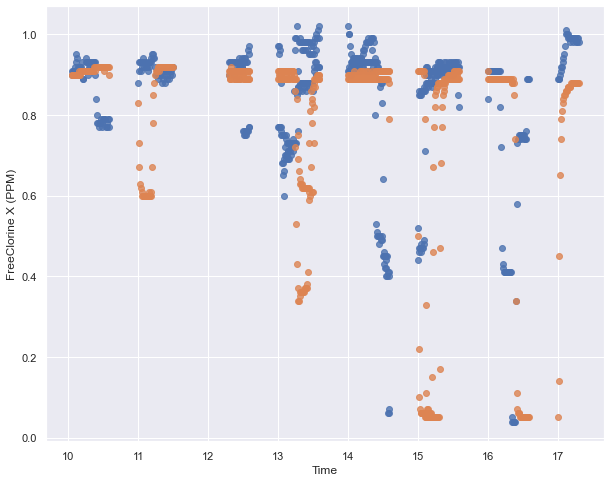

In [22]:
# Gráfico de Dispersión
	
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data['time'], y= data['FreeClorine_X_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data['time'], y= data['FreeClorine_X_1100ft(PPM)'], alpha= 0.8)

ax.set_xlabel('Time')
ax.set_ylabel('FreeClorine X (PPM)')

In [23]:
# Cálculo de correlaciones
print("-------------------------------------------")
print("     Para los dos días     ")
print("-------------------------------------------")
# Tiempo VS Free Chlorine (X) 80ft (PPM) 
print("Tiempo VS Free Chlorine (X) 80ft (PPM)")
print('Correlación Pearson: ', data['time'].corr(data['FreeClorine_X_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data['time'].corr(data['FreeClorine_X_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data['time'].corr(data['FreeClorine_X_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Free Chlorine (X) 1100ft (PPM) 
print("Tiempo VS Free Chlorine (X) 1100ft (PPM)")
print('Correlación Pearson: ', data['time'].corr(data['FreeClorine_X_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data['time'].corr(data['FreeClorine_X_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data['time'].corr(data['FreeClorine_X_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Difference 
print("Tiempo VS Difference")
print('Correlación Pearson: ', data['time'].corr(data['difference_FreeClorine_X'], method='pearson'))
print('Correlación Spearman: ', data['time'].corr(data['difference_FreeClorine_X'], method='spearman'))
print('Correlación Kendall: ', data['time'].corr(data['difference_FreeClorine_X'], method='kendall'))

-------------------------------------------
     Para los dos días     
-------------------------------------------
Free Chlorine (X) 80ft (PPM) VS tiempo
Correlación Pearson:  -0.17444916769411709
Correlación Spearman:  -0.08000849591646277
Correlación Kendall:  -0.055623406520268814
-------------------------------------------
Free Chlorine (X) 1100ft (PPM) VS tiempo
Correlación Pearson:  -0.2714860828390074
Correlación Spearman:  -0.4590574430929881
Correlación Kendall:  -0.32860485806099604
-------------------------------------------
Difference Free Chlorine (X) VS tiempo 
Correlación Pearson:  -0.12788718417594735
Correlación Spearman:  -0.2077603265343103
Correlación Kendall:  -0.11208545148828651


In [24]:
# Se separan los datos por días
# Dia 1
data1 = data[data['day'] == 1]

# Dia 2
data2 = data[data['day'] == 2]

### -------------------------------------------------------------------------------

### Para el día 1

Text(0, 0.5, 'FreeClorine X (PPM)')

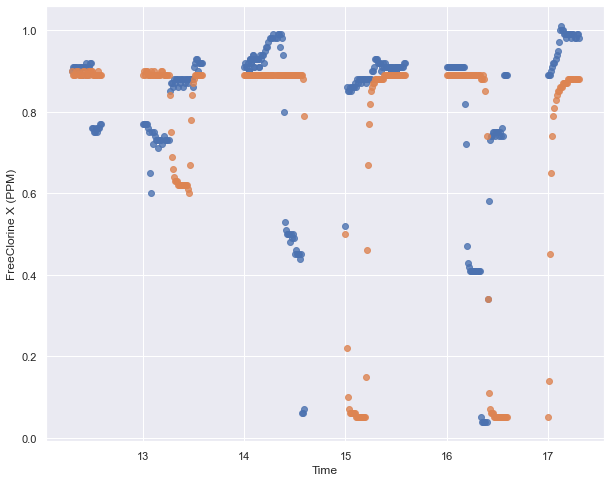

In [25]:
# Gráfico de Dispersión
	
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data1['time'], y= data1['FreeClorine_X_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data1['time'], y= data1['FreeClorine_X_1100ft(PPM)'], alpha= 0.8)

ax.set_xlabel('Time')
ax.set_ylabel('FreeClorine X (PPM)')

In [26]:
# Cálculo de correlaciones
print("-------------------------------------------")
print("     Para el día 1     ")
print("-------------------------------------------")
# Tiempo VS Free Chlorine (X) 80ft (PPM) 
print("Tiempo VS Free Chlorine (X) 80ft (PPM)")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_X_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Free Chlorine (X) 1100ft (PPM)
print("Tiempo VS Free Chlorine (X) 1100ft (PPM)")
print('Correlación Pearson: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['FreeClorine_X_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Difference 
print("Tiempo VS Difference")
print('Correlación Pearson: ', data1['time'].corr(data1['difference_FreeClorine_X'], method='pearson'))
print('Correlación Spearman: ', data1['time'].corr(data1['difference_FreeClorine_X'], method='spearman'))
print('Correlación Kendall: ', data1['time'].corr(data1['difference_FreeClorine_X'], method='kendall'))

-------------------------------------------
     Para el día 1     
-------------------------------------------
Free Chlorine (X) 80ft (PPM) VS tiempo
Correlación Pearson:  -0.06513453893911422
Correlación Spearman:  0.107991881469661
Correlación Kendall:  0.0992418653996097
-------------------------------------------
Free Chlorine (X) 1100ft (PPM) VS tiempo
Correlación Pearson:  -0.2692971859239502
Correlación Spearman:  -0.4367814757048561
Correlación Kendall:  -0.3185532435637292
-------------------------------------------
Difference Free Chlorine (X) VS tiempo 
Correlación Pearson:  -0.1801982907328295
Correlación Spearman:  -0.2613696451831584
Correlación Kendall:  -0.14544958045509343


### -------------------------------------------------------------------------------

### Para el día 2

Text(0, 0.5, 'FreeClorine X (PPM)')

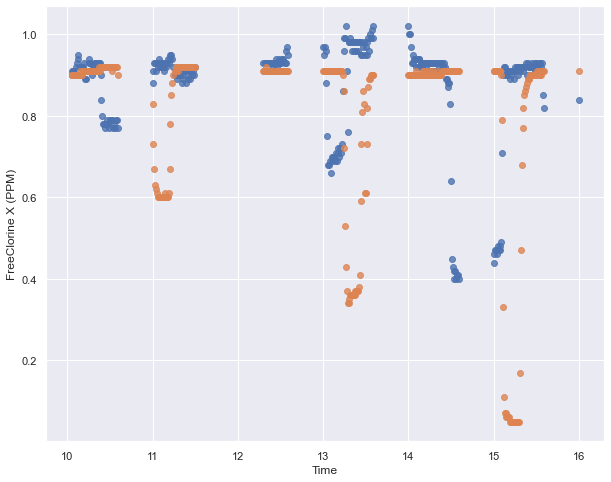

In [27]:
# Gráfico de Dispersión
	
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Azul
ax.scatter(x= data2['time'], y= data2['FreeClorine_X_80ft(PPM)'], alpha= 0.8)
# Naranja
ax.scatter(x= data2['time'], y= data2['FreeClorine_X_1100ft(PPM)'], alpha= 0.8)

ax.set_xlabel('Time')
ax.set_ylabel('FreeClorine X (PPM)')

In [28]:
# Cálculo de correlaciones
print("-------------------------------------------")
print("     Para el día 2     ")
print("-------------------------------------------")
# Tiempo VS Free Chlorine (X) 80ft (PPM)
print("Tiempo VS Free Chlorine (X) 80ft (PPM)")
print('Correlación Pearson: ', data2['time'].corr(data2['FreeClorine_X_80ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data2['time'].corr(data2['FreeClorine_X_80ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data2['time'].corr(data2['FreeClorine_X_80ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Free Chlorine (X) 1100ft (PPM)
print("Tiempo VS Free Chlorine (X) 1100ft (PPM)")
print('Correlación Pearson: ', data2['time'].corr(data2['FreeClorine_X_1100ft(PPM)'], method='pearson'))
print('Correlación Spearman: ', data2['time'].corr(data2['FreeClorine_X_1100ft(PPM)'], method='spearman'))
print('Correlación Kendall: ', data2['time'].corr(data2['FreeClorine_X_1100ft(PPM)'], method='kendall'))
print("-------------------------------------------")

# Tiempo VS Difference
print("Tiempo VS Difference")
print('Correlación Pearson: ', data2['time'].corr(data2['difference_FreeClorine_X'], method='pearson'))
print('Correlación Spearman: ', data2['time'].corr(data2['difference_FreeClorine_X'], method='spearman'))
print('Correlación Kendall: ', data2['time'].corr(data2['difference_FreeClorine_X'], method='kendall'))

-------------------------------------------
     Para el día 2     
-------------------------------------------
Free Chlorine (X) 80ft (PPM) VS tiempo
Correlación Pearson:  -0.1544322315424529
Correlación Spearman:  -0.016832875767889215
Correlación Kendall:  -0.00934123474749332
-------------------------------------------
Free Chlorine (X) 1100ft (PPM) VS tiempo
Correlación Pearson:  -0.2749851737510567
Correlación Spearman:  -0.36176044134578805
Correlación Kendall:  -0.2526281927311537
-------------------------------------------
Difference Free Chlorine (X) VS tiempo 
Correlación Pearson:  -0.15552995313373255
Correlación Spearman:  -0.17014247653874348
Correlación Kendall:  -0.09204324818372453
